Introduction
Dans ce notebook, nous explorons l'utilisation du modèle de facteur dynamique pour la prévision des séries temporelles multivariées. Le modèle de facteur dynamique est une méthode puissante qui permet de capturer les relations entre plusieurs séries temporelles en utilisant des facteurs latents. Cette approche est particulièrement utile pour les données présentant des tendances communes et des variations saisonnières.

Objectifs du notebook :
-Chargement et Préparation des Données :
Importer les bibliothèques nécessaires.
Charger les données de séries temporelles multivariées à partir d'un fichier CSV.
Préparer les données en supprimant les colonnes inutiles et en les formatant correctement.
-Exploration des Données :
Visualiser les données historiques pour comprendre les tendances et les variations saisonnières.
Application du Modèle de Facteur Dynamique :
Utiliser la bibliothèque statsmodels pour appliquer le modèle de facteur dynamique aux données.
Ajuster le modèle pour capturer les tendances et les variations saisonnières communes aux séries temporelles.

-Prévision des Valeurs Futures :
Utiliser le modèle ajusté pour prévoir les valeurs futures des séries temporelles.
Visualiser les prévisions et les comparer aux valeurs historiques.
-Évaluation du Modèle :
Évaluer la performance du modèle en utilisant des métriques de prévision appropriées.
Comparer les prévisions du modèle avec les valeurs réelles pour évaluer sa précision.

Métriques d'Évaluation :
Pour évaluer la performance du modèle de facteur dynamique, nous utiliserons les métriques suivantes :
RMSE (Root Mean Squared Error) : Mesure la racine carrée de la moyenne des carrés des erreurs. Plus la valeur est faible, meilleure est la performance du modèle.
MAE (Mean Absolute Error) : Mesure la moyenne des erreurs absolues. Plus la valeur est faible, meilleure est la performance du modèle.
MAPE (Mean Absolute Percentage Error) : Mesure la moyenne des erreurs absolues en pourcentage. Plus la valeur est faible, meilleure est la performance du modèle.

In [11]:
%config Completer.use_jedi=False
%config Completer.use_jedi=False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [12]:
serie_biv= pd.read_csv('C:/Users/Usuario/Desktop/Series/serie_biv.csv')

In [13]:
display(serie_biv)

,month,Num_Acc,Nb_morts
0,2005-03-01,10144,151
1,2005-04-01,10313,135
2,2005-05-01,12102,166
3,2005-06-01,12972,196
4,2005-07-01,12180,295
...,...,...,...
143,2017-02-01,6097,152
144,2017-03-01,7828,197
145,2017-04-01,7950,182
146,2017-05-01,7999,221


In [14]:
serie_biv=serie_biv.drop('month',axis=1)

In [15]:
display(serie_biv)

,Num_Acc,Nb_morts
0,10144,151
1,10313,135
2,12102,166
3,12972,196
4,12180,295
...,...,...
143,6097,152
144,7828,197
145,7950,182
146,7999,221


In [16]:
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


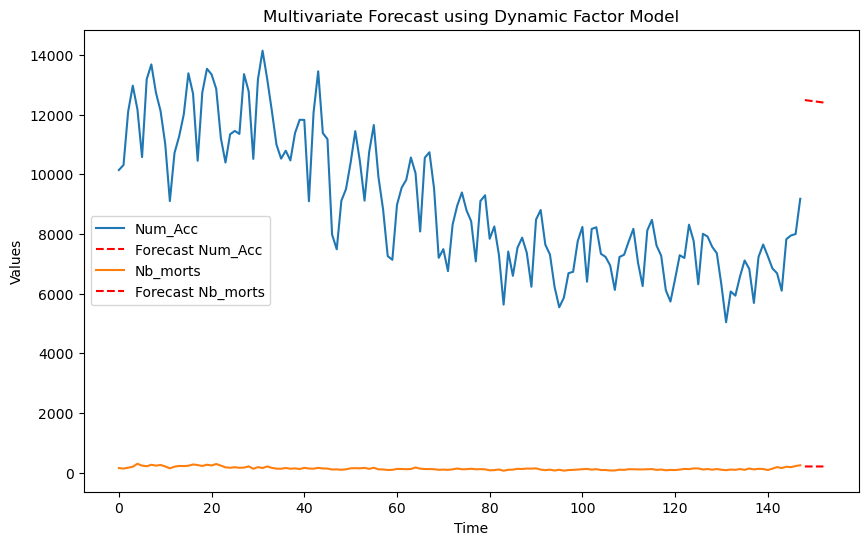

In [17]:
# Load multivariate time series data
data =serie_biv
# Fit the Dynamic Factor Model
model = DynamicFactor(data, k_factors=1, factor_order=1)
results = model.fit()
# Forecast future values
forecast = results.get_forecast(steps=5)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
for i in range(len(data.columns)):
    plt.plot(data.index, data.iloc[:, i], label=data.columns[i])
    plt.plot(range(len(data), len(data) + 5), forecast.predicted_mean.values[:, i], 'r--', label='Forecast '+data.columns[i])
plt.legend()
plt.title('Multivariate Forecast using Dynamic Factor Model')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


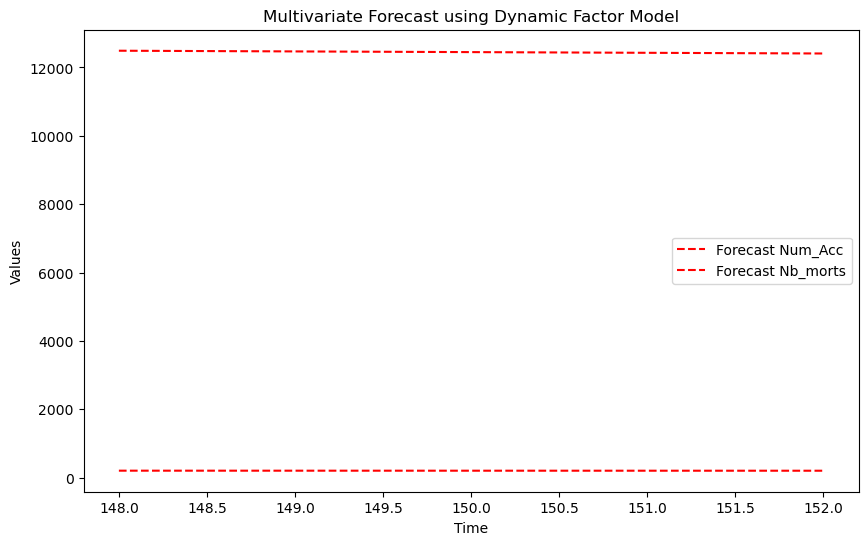

In [18]:
### Load multivariate time series data
data =serie_biv
# Fit the Dynamic Factor Model
model = DynamicFactor(data, k_factors=1, factor_order=1)
results = model.fit()
# Forecast future values
forecast = results.get_forecast(steps=5)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
for i in range(len(data.columns)):
    #plt.plot(data.index, data.iloc[:, i], label=data.columns[i])
    plt.plot(range(len(data), len(data) + 5), forecast.predicted_mean.values[:, i], 'r--', label='Forecast '+data.columns[i])
plt.legend()
plt.title('Multivariate Forecast using Dynamic Factor Model')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


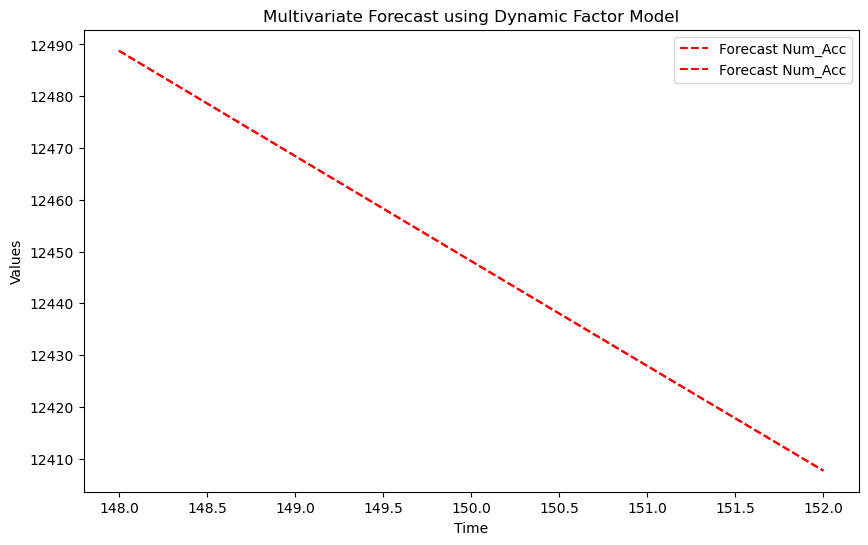

In [9]:
### Load multivariate time series data
data =serie_biv
# Fit the Dynamic Factor Model
model = DynamicFactor(data, k_factors=1, factor_order=1)
results = model.fit()
# Forecast future values
forecast = results.get_forecast(steps=5)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
for i in range(len(data.columns)):
    #plt.plot(data.index, data.iloc[:, i], label=data.columns[i])
    plt.plot(range(len(data), len(data) + 5), forecast.predicted_mean.values[:, 0], 'r--', label='Forecast '+data.columns[0])
plt.legend()
plt.title('Multivariate Forecast using Dynamic Factor Model')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [19]:
# Affichage des métriques d'évaluation pour les prévisions futures de Num_Acc
future_rmse_num_acc = np.sqrt(mean_squared_error(data['Num_Acc'][-5:], forecast.predicted_mean.values[:, 0]))
future_mae_num_acc = mean_absolute_error(data['Num_Acc'][-5:], forecast.predicted_mean.values[:, 0])
future_mape_num_acc = np.mean(np.abs((data['Num_Acc'][-5:] - forecast.predicted_mean.values[:, 0]) / data['Num_Acc'][-5:])) * 100

print('Performance des prévisions futures pour Num_Acc:')
print(f'RMSE: {future_rmse_num_acc}')
print(f'MAE: {future_mae_num_acc}')
print(f'MAPE: {future_mape_num_acc}%')
print('')

Performance des prévisions futures pour Num_Acc:
RMSE: 4746.545180705458
MAE: 4637.18697714195
MAPE: 62.24171883224996%



Conclusion
RMSE et MAE : Les valeurs de RMSE (4746.55) et de MAE (4637.19) montrent que les prévisions du modèle ont une erreur moyenne très élevée en termes d'unités. Cela suggère que le modèle a des difficultés à prédire avec précision les valeurs futures de Num_Acc.
MAPE : Une valeur de MAPE de 62.24% est extrêmement élevée, indiquant que les prévisions du modèle s'écartent en moyenne de 62.24% des valeurs réelles. Cela montre que le modèle est très imprécis dans ses prévisions futures pour Num_Acc.

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


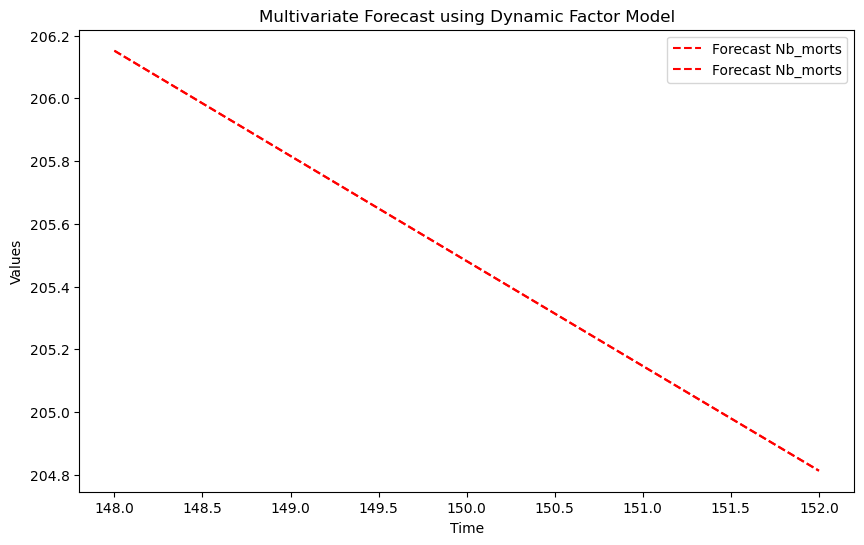

In [20]:
### Load multivariate time series data
data =serie_biv
# Fit the Dynamic Factor Model
model = DynamicFactor(data, k_factors=1, factor_order=1)
results = model.fit()
# Forecast future values
forecast = results.get_forecast(steps=5)
# Plot the forecasted values
plt.figure(figsize=(10, 6))
for i in range(len(data.columns)):
    #plt.plot(data.index, data.iloc[:, i], label=data.columns[i])
    plt.plot(range(len(data), len(data) + 5), forecast.predicted_mean.values[:,1 ], 'r--', label='Forecast '+data.columns[1])
plt.legend()
plt.title('Multivariate Forecast using Dynamic Factor Model')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [21]:
# Affichage des métriques d'évaluation pour les prévisions futures de Nb_morts
future_rmse_nb_morts = np.sqrt(mean_squared_error(data['Nb_morts'][-5:], forecast.predicted_mean.values[:, 1]))
future_mae_nb_morts = mean_absolute_error(data['Nb_morts'][-5:], forecast.predicted_mean.values[:, 1])
future_mape_nb_morts = np.mean(np.abs((data['Nb_morts'][-5:] - forecast.predicted_mean.values[:, 1]) / data['Nb_morts'][-5:])) * 100

print('Performance des prévisions futures pour Nb_morts:')
print(f'RMSE: {future_rmse_nb_morts}')
print(f'MAE: {future_mae_nb_morts}')
print(f'MAPE: {future_mape_nb_morts}%')
print('')

Performance des prévisions futures pour Nb_morts:
RMSE: 33.19408773227458
MAE: 28.697980673615156
MAPE: 15.383889908617036%



Conclusion
RMSE et MAE : Les valeurs de RMSE (33.19) et de MAE (28.70) montrent que les prévisions du modèle ont une erreur moyenne modérée en termes d'unités. Cela suggère que le modèle a une performance acceptable mais qu'il pourrait être amélioré pour réduire ces erreurs.
MAPE : Une valeur de MAPE de 15.38% est relativement élevée, indiquant que les prévisions du modèle s'écartent en moyenne de 15.38% des valeurs réelles. Cela montre que le modèle pourrait être amélioré pour obtenir des prédictions plus précises en termes de pourcentage.

Serie morts originale sans corriger

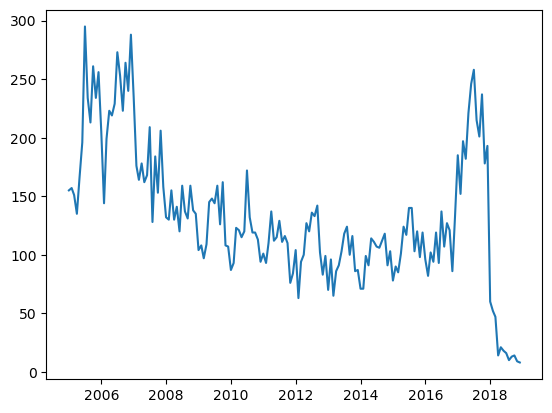

In [ ]:
Serie accidents originale sans corriger

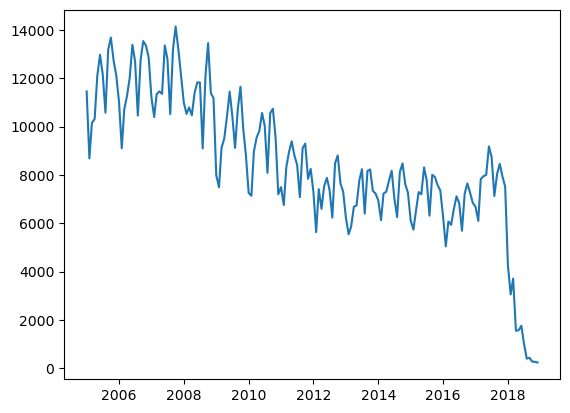